<a href="https://colab.research.google.com/github/aman-jn7/Medlr-Assign/blob/main/Medler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
df = pd.read_csv('/content/medlr_assignment_dataset.csv')

In [3]:
df.head()

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts
0,source_6-75716,Dolo 1gm Tablet,source_6,False,45.58,40.11,micro labs,10 Tablet(s) in Strip,STRIP,Paracetamol / Acetaminophen(1.0 G)
1,source_2-39579,Dolo 1000mg Infusion,source_2,True,268.00,219.76,micro labs ltd,NaN,NaN,Paracetamol/Acetaminophen 1000mg
2,source_7-90343,Dolo 1000mg Tablet,source_7,False,45.58,35.10,micro labs ltd,10.0 tablets in 1 strip,NaN,Paracetamol (1000mg)
3,source_1-65076,Dolo 1000 mg Tablet 10's,source_1,True,45.50,40.00,micro labs ltd,10,Strip | Tablet,PARACETAMOL-1000MG
4,source_1-65077,Dolo 120 mg Suspension 60 ml,source_1,False,40.00,35.20,micro labs ltd,60,Bottle | Suspension,PARACETAMOL-120MG


In [4]:
df.describe()

,retail_price,discounted_price
count,1367.000000,1384.000000
mean,145.609056,117.881290
std,765.382559,528.131513
min,2.000000,1.760000
25%,33.500000,29.032500
50%,59.630000,52.050000
75%,106.215000,93.345000
max,15620.000000,12496.000000


In [5]:
df.columns

Index(['id', 'name', 'source', 'prescription_required', 'retail_price',
       'discounted_price', 'manufacturer', 'quantity', 'packaging_form',
       'salts'],
      dtype='object')

In [6]:
df.dtypes

,0
id,object
name,object
source,object
prescription_required,bool
retail_price,float64
discounted_price,float64
manufacturer,object
quantity,object
packaging_form,object
salts,object


In [7]:
# Check for the NaN values in each column
df.isnull().sum()

,0
id,0
name,0
source,0
prescription_required,0
retail_price,81
discounted_price,64
manufacturer,2
quantity,264
packaging_form,517
salts,59


In [8]:
# Remove rows where 'manufacturer' is NaN
df = df.dropna(subset=['manufacturer'])

# Remove rows where 'salts' is NaN
df = df.dropna(subset=['salts'])

In [9]:
# Standardize column names
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# Standardize medicine names
df['name'] = df['name'].str.lower().str.strip()
df['name'] = df['name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]', '', str(x)))

# Standardize manufacturer names
df['manufacturer'] = df['manufacturer'].astype(str).str.lower().str.strip()

# Standardize salts
df['salts'] = df['salts'].astype(str).str.lower().str.strip()

In [10]:
#Filling the average value in retail_price and discounted price where it is nill
df['retail_price'].fillna(df['retail_price'].mean(), inplace=True)
df['discounted_price'].fillna(df['discounted_price'].mean(), inplace=True)

<ipython-input-10-29e3bf802201>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['retail_price'].fillna(df['retail_price'].mean(), inplace=True)
<ipython-input-10-29e3bf802201>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [11]:
# Fill missing packaging_form based on name keywords only if empty
mask = df['packaging_form'].isna()

# Define conditions and choices for packaging form assignment
conditions = [
    df['name'].str.contains('tablet|capsule', case=False, na=False),
    df['name'].str.contains('syrup|suspension|drops|infusion', case=False, na=False),
    df['name'].str.contains('cream|tube', case=False, na=False),
    df['name'].str.contains('injection', case=False, na=False)
]
choices = ['strip', 'bottle', 'tube', 'injection']

# Apply np.select to all rows
df['packaging_form_temp'] = np.select(conditions, choices, default=df['packaging_form'])

# Update only the missing values
df.loc[mask, 'packaging_form'] = df.loc[mask, 'packaging_form_temp']

# Drop the temporary column
df.drop(columns=['packaging_form_temp'], inplace=True)


In [12]:
df.isnull().sum()

,0
id,0
name,0
source,0
prescription_required,0
retail_price,0
discounted_price,0
manufacturer,0
quantity,253
packaging_form,33
salts,0


In [13]:
# Remove rows where 'packaging_form' is NaN
df = df.dropna(subset=['packaging_form'])

In [14]:
df.isnull().sum()

,0
id,0
name,0
source,0
prescription_required,0
retail_price,0
discounted_price,0
manufacturer,0
quantity,239
packaging_form,0
salts,0


In [15]:
# Extract quantity from the last integer in the name column only if missing
quantity_mask = df['quantity'].isna() | (df['quantity'] == 'nan')
df.loc[quantity_mask, 'quantity'] = df.loc[quantity_mask, 'name'].apply(lambda x: re.findall(r'\d+', x)[-1] if re.search(r'\d+', x) else np.nan)

In [16]:
# For the rest of the missing values we can assign typical quantity based on packaging_form
df.loc[(df['quantity'].isna()) & (df['packaging_form'] == 'strip'), 'quantity'] = '10 tablets'
df.loc[(df['quantity'].isna()) & (df['packaging_form'] == 'bottle'), 'quantity'] = '100 ml'
df.loc[(df['quantity'].isna()) & (df['packaging_form'] == 'tube'), 'quantity'] = '30 gm'
df.loc[(df['quantity'].isna()) & (df['packaging_form'] == 'injection'), 'quantity'] = '1 vial'

In [17]:
# Remove rows where 'quantity' is NaN
df = df.dropna(subset=['quantity'])

In [18]:
df.isnull().sum()

,0
id,0
name,0
source,0
prescription_required,0
retail_price,0
discounted_price,0
manufacturer,0
quantity,0
packaging_form,0
salts,0


In [19]:
df.shape

(1352, 10)

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [21]:
# Convert 'salts', 'packaging_form', 'manufacturer' to numerical categories
le_salts = LabelEncoder()
df['salts_encoded'] = le_salts.fit_transform(df['salts'])

le_packaging = LabelEncoder()
df['packaging_encoded'] = le_packaging.fit_transform(df['packaging_form'])

le_manufacturer = LabelEncoder()
df['manufacturer_encoded'] = le_manufacturer.fit_transform(df['manufacturer'])

# Convert quantity to numeric (Extracting numbers)
df['quantity_numeric'] = df['quantity'].str.extract('(\d+)').astype(float)

# Normalize price values
scaler = StandardScaler()
df[['retail_price_scaled', 'discounted_price_scaled']] = scaler.fit_transform(df[['retail_price', 'discounted_price']])

# Select final features for clustering
features = df[['salts_encoded', 'packaging_encoded', 'manufacturer_encoded', 'quantity_numeric',
               'retail_price_scaled', 'discounted_price_scaled']]

In [22]:
!pip install sentence-transformers faiss-cpu pinecone-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 871.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [23]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained transformer model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create a text representation by combining key fields
df['text_representation'] = df['name'] + " " + df['salts'] + " " + df['packaging_form']

# Convert text to embeddings
embeddings = model.encode(df['text_representation'].tolist())

# Convert embeddings to NumPy array for clustering
embeddings = np.array(embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [24]:
import faiss  # Import FAISS (Facebook AI Similarity Search) for fast vector similarity search

# Create an index for fast similarity search
index = faiss.IndexFlatL2(embeddings.shape[1])  # Use L2 (Euclidean) distance for similarity measurement
index.add(embeddings)  # Add medicine embeddings to FAISS for efficient retrieval

# Function to retrieve similar medicines
def get_similar_medicines(query_text, top_n=5):
    """
    Given a query medicine name, find the top-N most similar medicines based on vector embeddings.

    Parameters:
        query_text (str): The name of the medicine to search for.
        top_n (int): Number of similar medicines to retrieve.

    Returns:
        DataFrame: A subset of the dataset containing similar medicines.
    """
    query_embedding = model.encode([query_text])  # Convert query text into an embedding
    distances, indices = index.search(query_embedding, top_n)  # Perform similarity search in FAISS index
    return df.iloc[indices[0]]  # Retrieve and return the similar medicines from the dataset

# Example: Find similar medicines to "Paracetamol 500mg Tablet"
query = "Paracetamol 500mg Tablet"
similar_medicines = get_similar_medicines(query)

# Print the results with key medicine attributes
print(similar_medicines[['name', 'salts', 'packaging_form']])


                      name                            salts packaging_form
954      paracip500 tablet                paracetamol 500mg          strip
1404    paracetamol tablet  paracetamol/acetaminophen 500mg          strip
975         paracip tablet  paracetamol/acetaminophen 500mg          strip
57    dolo sp 500mg tablet  paracetamol/acetaminophen 500mg          strip
955     paracip 500 tablet              paracetamol (500mg)          strip


In [25]:
from sklearn.cluster import KMeans

# Apply K-Means clustering to embeddings
num_clusters = 5  # Adjust based on optimal Elbow Method
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['cluster_id'] = kmeans.fit_predict(embeddings)

# Check cluster distribution
print(df['cluster_id'].value_counts())

cluster_id
4    426
1    422
0    208
3    163
2    133
Name: count, dtype: int64


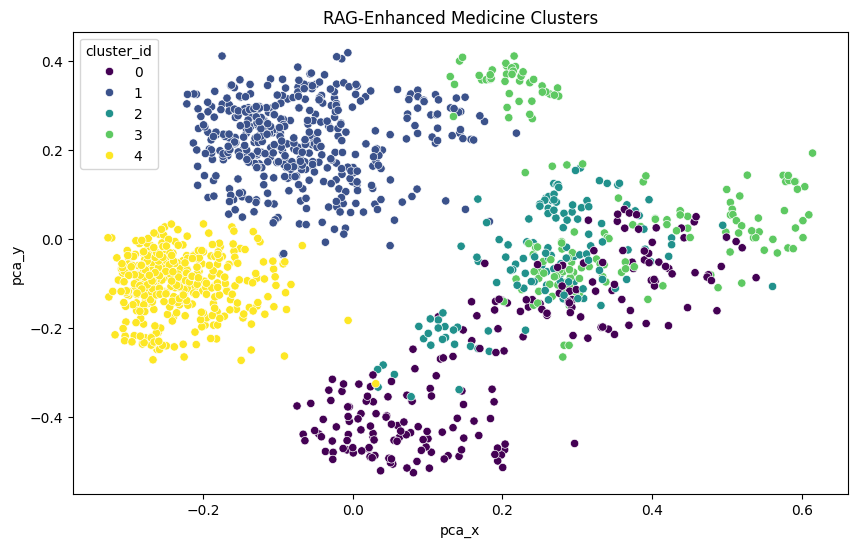

In [26]:
from sklearn.decomposition import PCA

# Reduce embeddings to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Add PCA results to DataFrame
df['pca_x'] = embeddings_2d[:, 0]
df['pca_y'] = embeddings_2d[:, 1]

# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['pca_x'], y=df['pca_y'], hue=df['cluster_id'], palette='viridis')
plt.title("RAG-Enhanced Medicine Clusters")
plt.show()

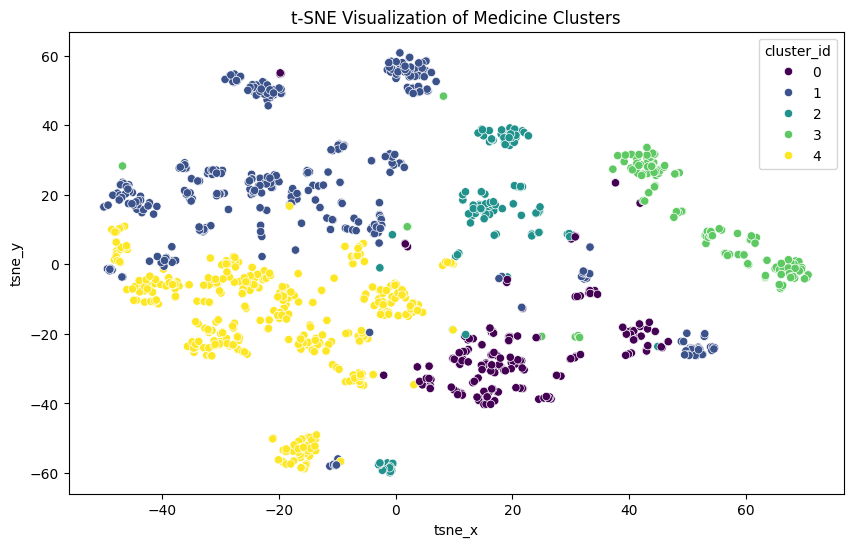

In [27]:
# t-SNE (t-Distributed Stochastic Neighbor Embedding) is used for dimensionality reduction.
# It helps visualize high-dimensional data (like embeddings) in a lower-dimensional space (2D).
# Unlike PCA, t-SNE preserves local structure, making it useful for understanding cluster separations.
from sklearn.manifold import TSNE

# Reduce embeddings to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
tsne_features = tsne.fit_transform(embeddings)

# Add t-SNE results to DataFrame
df['tsne_x'] = tsne_features[:, 0]
df['tsne_y'] = tsne_features[:, 1]

# Plot t-SNE Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['tsne_x'], y=df['tsne_y'], hue=df['cluster_id'], palette='viridis')
plt.title("t-SNE Visualization of Medicine Clusters")
plt.show()


In [28]:
table_columns = ['name', 'salts', 'packaging_form', 'quantity', 'retail_price', 'cluster_id']
print(df[table_columns].groupby('cluster_id').head(1))

                             name                                  salts  \
0                 dolo 1gm tablet     paracetamol / acetaminophen(1.0 g)   
1            dolo 1000mg infusion       paracetamol/acetaminophen 1000mg   
25  dolo ampoule of 2ml injection  paracetamol / acetaminophen(150.0 mg)   
30    dolo cold adult nasal drops                         xylometazoline   
36                 dolo g tablets           dicyclomine + mefenamic acid   

   packaging_form                   quantity  retail_price  cluster_id  
0           STRIP      10 Tablet(s) in Strip         45.58           4  
1          bottle                       1000        268.00           0  
25        AMPOULE   2ml Injection in Ampoule          9.80           2  
30         BOTTLE  10ml Nasal Drop in Bottle         40.83           3  
36          STRIP      10 Tablet(s) in Strip         30.91           1  


In [29]:
df.head()

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts,...,manufacturer_encoded,quantity_numeric,retail_price_scaled,discounted_price_scaled,text_representation,cluster_id,pca_x,pca_y,tsne_x,tsne_y
0,source_6-75716,dolo 1gm tablet,source_6,False,45.58,40.11,micro labs,10 Tablet(s) in Strip,STRIP,paracetamol / acetaminophen(1.0 g),...,176,10.0,-0.127648,-0.141504,dolo 1gm tablet paracetamol / acetaminophen(1....,4,-0.227030,-0.090654,-0.767654,-11.083731
1,source_2-39579,dolo 1000mg infusion,source_2,True,268.00,219.76,micro labs ltd,1000,bottle,paracetamol/acetaminophen 1000mg,...,177,1000.0,0.163052,0.198125,dolo 1000mg infusion paracetamol/acetaminophen...,0,0.027374,-0.365340,16.387445,-19.510807
2,source_7-90343,dolo 1000mg tablet,source_7,False,45.58,35.10,micro labs ltd,10.0 tablets in 1 strip,strip,paracetamol (1000mg),...,177,10.0,-0.127648,-0.150975,dolo 1000mg tablet paracetamol (1000mg) strip,4,-0.228348,-0.073459,-0.631132,-9.369249
3,source_1-65076,dolo 1000 mg tablet 10s,source_1,True,45.50,40.00,micro labs ltd,10,Strip | Tablet,paracetamol-1000mg,...,177,10.0,-0.127753,-0.141712,dolo 1000 mg tablet 10s paracetamol-1000mg Str...,4,-0.252964,-0.070196,-2.806596,-7.504595
4,source_1-65077,dolo 120 mg suspension 60 ml,source_1,False,40.00,35.20,micro labs ltd,60,Bottle | Suspension,paracetamol-120mg,...,177,60.0,-0.134941,-0.150786,dolo 120 mg suspension 60 ml paracetamol-120mg...,0,0.127321,-0.486291,19.947353,-28.735262


In [30]:
df[table_columns].to_csv("/content/medicine_clusters.csv", index=False)  # Save clustered medicine table

In [31]:
# Save cleaned and clustered data
df.to_csv("/content/cleaned_clustered_medicines.csv", index=False)
print("Clustering complete. Results saved to cleaned_clustered_medicines.csv and medicine_clusters.csv")

Clustering complete. Results saved to cleaned_clustered_medicines.csv and medicine_clusters.csv
